# Final Project on Gamma Data

In [172]:
import numpy as np
import pandas as pd
from sklearn import cluster
from pathlib import Path
import matplotlib.pyplot as plt 
from sklearn.neighbors import NearestNeighbors 
from matplotlib import colors 

# 1. Import the data

In [158]:
# import the data 
gamma_labels = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
gamma_gh_df = pd.read_csv("magic+gamma+telescope/magic04.csv", names=gamma_labels)
gamma_df = pd.read_csv("magic+gamma+telescope/magic04.csv", names=gamma_labels)
gamma_gh_df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


# 2. Clean and normalize the data

In [159]:
# Turn g into 1 and h into 0 to help seperate the data, get Y
classgh = gamma_gh_df['class'].to_numpy()
Y = []
for i in range(len(classgh)):
    if(classgh[i] == 'g'):
        Y.append(1)
    else:
        Y.append(0)
Y = np.array(class10)
gamma_df['class'] = Y
gamma_df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [160]:
# Normalize the data, get X
X = gamma_df[["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist"]].to_numpy()

a = np.min(X, axis=0)
b = np.max(X, axis=0)
A = np.full(X.shape, a)
B = np.full(X.shape, b)

XN = (X - A)/(B - A)
print(XN)
print(Y)

[[0.0743064  0.06241507 0.20804258 ... 0.51249308 0.44546667 0.1630664 ]
 [0.08281491 0.04572669 0.17066824 ... 0.50794422 0.07067667 0.41267917]
 [0.4782407  0.53057937 0.62681845 ... 0.41654048 0.85511111 0.51692609]
 ...
 [0.21571204 0.18538938 0.44559432 ... 0.5092176  0.33665222 0.51637701]
 [0.35232583 0.29995007 0.60691898 ... 0.36826282 0.94097111 0.82349138]
 [0.55441499 0.20672824 0.37492608 ... 0.61535411 0.5859     0.54834441]]
[1 1 1 ... 0 0 0]


# 3. Create the loss function

In [300]:
# Define the loss function
# This one prints more information
def lossfunctionprint(labels, gamma, lambda1=200, lambda2=0.05, lambda3=100):

    clusterproportion = [] #list of fractions: gamma points in cluster over cluster size for each cluster
    clustersize = [] #list of integers: size of each cluster
    clusterscore = [] #list of scores for each cluster: absolute value of gamma points minus hadron points in the clusters
    for i in range(1, np.shape(np.unique(labels))[0]):
        clusterindexes = np.where(labels == np.unique(labels)[i])[0] #indexes of points in a particular cluster
        tempsize = np.shape(gamma[clusterindexes])[0] #size of cluster i
        tempproportion = np.sum(gamma[clusterindexes] == 1)/(tempsize) #number of gamma points in cluster over cluster size for cluster i
        clusterproportion.append(tempproportion)
        clustersize.append(tempsize)
        #clusterscore.append(abs(np.sum(gamma[clusterindexes] == 1) - np.sum(gamma[clusterindexes] == 0)))
    clusterproportion = np.array(clusterproportion)
    clustersize = np.array(clustersize)
    #clusterscore = np.array(clusterscore)

    temp = np.where(labels == 0)[0]
    glargeclustercount = np.sum(gamma[temp] == 1)
    hlargeclustercount = np.sum(gamma[temp] == 0)
    htotal = np.sum(gamma == 0)
    totalcount = np.shape(labels)[0]
    accuracy = (glargeclustercount + htotal - hlargeclustercount)/totalcount

    gammaoutlierproportion = np.sum(gamma[np.where(labels == -1)[0]])/np.sum(gamma) #number of gamma points that are outliers over total number of gamma points
    clustercount = np.shape(np.unique(labels))[0] - 1 #total number of clusters

    clustereffect = np.sum((clusterproportion*(1 - clusterproportion)*4)*clustersize/(np.shape(labels)[0]))

    print("clustersize:", clustersize)

    print("clusterproportion:", clusterproportion)

    print(gammaoutlierproportion, clustercount, clustereffect)

    outlierindexes = np.where(labels == -1)[0]
    outlierscore = np.sum(gamma[outlierindexes] == 0) #number of outliers that are hadron points

    totalcount = np.shape(labels)[0] 


    print("accuracy:", accuracy)

    return lambda1*gammaoutlierproportion + lambda2*clustercount + lambda3*clustereffect

In [299]:
# Define the loss function 
def lossfunction(labels, gamma, lambda1=200, lambda2=0.05, lambda3=100):
    unique_labels = np.unique(labels)
    clusterproportion = []
    clustersize = []

    for label in unique_labels:
        if label == -1:
            continue  # Skip outliers
        indices = np.where(labels == label)[0]
        if len(indices) == 0:
            continue
        gamma_count = np.sum(pulsar[indices])
        proportion = gamma_count / len(indices)
        clusterproportion.append(proportion)
        clustersize.append(len(indices))

    clusterproportion = np.array(clusterproportion)
    clustersize = np.array(clustersize)

    gamma_outlier_prop = np.sum(gamma[labels == -1]) / np.sum(gamma)
    cluster_count = len(unique_labels) - (1 if -1 in unique_labels else 0)
    clustereffect = np.sum((clusterproportion * (1 - clusterproportion) * 4) * clustersize / len(labels))

    return lambda1 * pulsar_outlier_prop + lambda2 * cluster_count + lambda3 * clustereffect

In [220]:
# Function to run the loss function 
def runlossfunction(X, y, radius, minsamples, lambda1, lambda2, lambda3):
    model = cluster.DBSCAN(eps=radius, min_samples=minsamples)
    fittest = model.fit(X)

    labels = fittest.labels_
    return lossfunction(labels, y, lambda1, lambda2, lambda3)

In [221]:
# Function to iterate the loss function thru multiple radii 
def iterateradius(X, y, minsamples, radiusmin, radiusmax, radiusstep, lambda1, lambda2, lambda3):
    n = round((radiusmax - radiusmin)/radiusstep) + 1
    lossresults = []
    for i in range(n):
        radius = radiusmin + i*radiusstep
        temp = runlossfunction(X, y, radius, minsamples, lambda1, lambda2, lambda3)
        lossresults.append(temp)
    print('lossresults',lossresults,'\\')
    return np.array(lossresults)

In [301]:
# Function to run different minimum samples, returns the best radius and loss function for each min sample size 
def min_samples(X, y, min_sample_low, min_sample_high, radiusmin, radiusmax, radiusstep, lambda1, lambda2, lambda3):
    loss_from_radius = [] 
    for minsamp in range(min_sample_low, min_sample_high):
        losses = iterateradius(X, y, minsamp, radiusmin, radiusmax, radiusstep, lambda1, lambda2, lambda3) 
        loss_from_radius.append(losses) 
    return loss_from_radius 

In [223]:
# Function to find the hyperparameters based on a radius range and the data 
def find_hypers(X, y, min_sample_low, min_sample_high, radiusmin, radiusmax, radiusstep, lambda1, lambda2, lambda3):
    loss_from_radius = min_samples(X, y, min_sample_low, min_sample_high, radiusmin, radiusmax, radiusstep, lambda1, lambda2, lambda3)
    loss_arr = np.array(loss_from_radius)
    return loss_arr

In [226]:
# Find the best hyperparameter 
def find_hyper(arr, min_sample_low, min_sample_high, radiusmin, radiusmax, radiusstep):
    row_data = []
    for i in range (arr.shape[0]):
        index = arr[i,:].argmin() # gives the minimum loss for each radius 
        loss = arr[i,index]
        radius = radiusmin + index*radiusstep
        row_data.append([radius,loss])

    print('row_data:',row_data,'\\')
    row_data = np.array(row_data)
    ind = row_data[:,1].argmin()
    radius = row_data[ind,0]
    minsamp = ind + min_sample_low
    loss = row_data[ind,1]
    print('best hyperparameters are:\n radius:',radius,'minsamp:',minsamp,'loss:',loss)
    return [radius,minsamp,loss] 

In [294]:
# We can test individual radius and minisamples here 
def clusterinfo(radius,minsamples,lambda1=200, lambda2=0.05, lambda3=100):
    star_clustertest = cluster.DBSCAN(eps=radius, min_samples=minsamples)
    fittest = star_clustertest.fit(XN)
    
    labelstest = fittest.labels_
    testresult = lossfunctionprint(labelstest, class10)
    
    print("radius: ", radius)
    print("minsamples: ", minsamples)
    print("testresult: ", testresult)

# 4. Test the data and find optimal hyperparameters 

In [302]:
# Find information about a specific radius and minsamples 
radius = 0.095
minsamples = 13
clusterinfo(radius,minsamples)

clustersize: [13500    17    16    12     6    11]
clusterproportion: [0.79540741 0.11764706 1.         0.83333333 0.5        0.45454545]
0.12633798248459294 6 0.4636327874943325
accuracy: 0.7709779179810725
radius:  0.095
minsamples:  13
testresult:  71.93087524635183


In [284]:
# Let's find the results for all the data 
loss_data = find_hypers(XN, Y, 3, 18, .075, .175, .02, lambda1=200, lambda2=0.05, lambda3=100)
try_hypers = find_hyper(loss_data,3, 18, .075, .175, .01)

lossresults [79.6760642435523, 71.05851134198956, 73.0515319632735, 76.62961202292806, 81.25673071811735, 84.37573138842507] \
lossresults [78.88180573291771, 69.5089930343203, 70.84349227093011, 74.34289014754167, 78.49674689300922, 81.84223174119364] \
lossresults [80.66801048458474, 69.25388623960588, 69.93042094777968, 73.00755807490715, 77.05643945023834, 80.75503691803513] \
lossresults [82.52038467934696, 69.21726488693757, 69.59043202972977, 72.29123596317055, 75.81444959489002, 79.65907273510747] \
lossresults [86.18004636490745, 69.38127864770141, 69.46048826731266, 71.54610742759544, 75.29095398279738, 79.03527906650598] \
lossresults [90.45705075687108, 69.4625062175933, 69.25725192492426, 71.34912744936396, 74.95485780218664, 78.28185692693332] \
lossresults [93.45686059542805, 70.34333579289984, 68.7627466327025, 71.09440044316271, 74.37229389810314, 77.99770883307382] \
lossresults [97.77820732876259, 70.92507276211876, 68.60768095847557, 70.87492973150631, 74.1338721481

Final result for radius step size of .02: radius: 0.095 minsamp: 13 loss: 68.58121976917123

lossresults [79.6760642435523, 71.05851134198956, 73.0515319632735, 76.62961202292806, 81.25673071811735, 84.37573138842507] \
lossresults [78.88180573291771, 69.5089930343203, 70.84349227093011, 74.34289014754167, 78.49674689300922, 81.84223174119364] \
lossresults [80.66801048458474, 69.25388623960588, 69.93042094777968, 73.00755807490715, 77.05643945023834, 80.75503691803513] \
lossresults [82.52038467934696, 69.21726488693757, 69.59043202972977, 72.29123596317055, 75.81444959489002, 79.65907273510747] \
lossresults [86.18004636490745, 69.38127864770141, 69.46048826731266, 71.54610742759544, 75.29095398279738, 79.03527906650598] \
lossresults [90.45705075687108, 69.4625062175933, 69.25725192492426, 71.34912744936396, 74.95485780218664, 78.28185692693332] \
lossresults [93.45686059542805, 70.34333579289984, 68.7627466327025, 71.09440044316271, 74.37229389810314, 77.99770883307382] \
lossresults [97.77820732876259, 70.92507276211876, 68.60768095847557, 70.87492973150631, 74.1338721481386, 77.58995379982393] \
lossresults [101.21832716446312, 71.33362313671071, 68.63719683011419, 70.51459287355412, 73.79129003320905, 77.17202918494985] \
lossresults [104.09077101134518, 71.60578741029617, 68.63192118874852, 70.30715885981009, 73.61279881432344, 76.89036391217198] \
lossresults [108.03254292445651, 71.93087524635183, 68.58121976917123, 70.21046317042868, 73.26926748449088, 76.67080660289868] \
lossresults [111.04945453940502, 72.1712754164399, 68.67657129598825, 70.0211293066894, 72.95574824340868, 76.52332070825786] \
lossresults [115.09407120805466, 72.51306266188945, 68.89632210443871, 69.89382042462528, 72.79328079018546, 76.12950546685464] \
lossresults [118.94095779845009, 72.62352879993992, 68.89637849447719, 69.8966727929829, 72.74839836463411, 75.92511550408032] \
lossresults [121.88359130144065, 73.38092790914848, 69.14148973683196, 69.60657824492333, 72.74054271562208, 75.8014505485603] \
row_data: [[0.08499999999999999, 71.05851134198956], [0.08499999999999999, 69.5089930343203], [0.08499999999999999, 69.25388623960588], [0.08499999999999999, 69.21726488693757], [0.08499999999999999, 69.38127864770141], [0.095, 69.25725192492426], [0.095, 68.7627466327025], [0.095, 68.60768095847557], [0.095, 68.63719683011419], [0.095, 68.63192118874852], [0.095, 68.58121976917123], [0.095, 68.67657129598825], [0.095, 68.89632210443871], [0.095, 68.89637849447719], [0.095, 69.14148973683196]] \
best hyperparameters are:
 radius: 0.095 minsamp: 13 loss: 68.58121976917123

Final Results for radius step size of .05: radius: 0.125 minsamp: 17 loss: 68.70387608147294

lossresults [79.6760642435523, 74.49458298293159, 84.37573138842507]\
lossresults [78.88180573291771, 72.49701157251812, 81.84223174119364]\
lossresults [80.66801048458474, 71.31429382746481, 80.75503691803513]\
lossresults [82.52038467934696, 70.74408546198332, 79.65907273510747]\
lossresults [86.18004636490745, 70.42841556456086, 79.03527906650598]\
lossresults [90.45705075687108, 70.16522887182529, 78.28185692693332]\
lossresults [93.45686059542805, 69.86649153182596, 77.99770883307382]\
lossresults [97.77820732876259, 69.74822077246891, 77.58995379982393]\
lossresults [101.21832716446312, 69.66105499732059, 77.17202918494985]\
lossresults [104.09077101134518, 69.44490715073422, 76.89036391217198]\
lossresults [108.03254292445651, 69.26712563223595, 76.67080660289868]\
lossresults [111.04945453940502, 69.12131099469653, 76.52332070825786]\
lossresults [115.09407120805466, 69.01030629100745, 76.12950546685464]\
lossresults [118.94095779845009, 68.74197199770506, 75.92511550408032]\
lossresults [121.88359130144065, 68.70387608147294, 75.8014505485603]\
row_data: [[0.125, 74.49458298293159], [0.125, 72.49701157251812], [0.125, 71.31429382746481], [0.125, 70.74408546198332], [0.125, 70.42841556456086], [0.125, 70.16522887182529], [0.125, 69.86649153182596], [0.125, 69.74822077246891], [0.125, 69.66105499732059], [0.125, 69.44490715073422], [0.125, 69.26712563223595], [0.125, 69.12131099469653], [0.125, 69.01030629100745], [0.125, 68.74197199770506], [0.125, 68.70387608147294]] \
best hyperparameters are:
 radius: 0.125 minsamp: 17 loss: 68.70387608147294

In [289]:
# Find the optimal hyperparameters for each subset of the data so we can average them to find the optimal parameters for smaller datasets 
valid_data = np.arange(0, 19020)
np.random.shuffle(valid_data)

n = len(valid_data)
m = round(0.2 * n)

valid_results = [] 
for i in range(5):
    v = np.concatenate([valid_data[:i*m],valid_data[(i+1)*m:]])
    val_rei = find_hypers(XN[v], Y[v], 3, 18, .075, .175, .05, lambda1=200, lambda2=0.05, lambda3=100)
    val_re = find_hyper(val_rei,3, 18, .075, .175, .05)
    valid_results.append(val_rei) 

print(valid_results)

lossresults [81.48415072385134, 73.25143235624677, 82.85229796178353] \
lossresults [81.68328149948972, 71.76215083166218, 80.48585953770424] \
lossresults [84.15394677497602, 70.51341335737408, 79.43105503384112] \
lossresults [87.86103760785102, 70.08066944143992, 78.49526710988397] \
lossresults [92.34313429522, 69.81320301349722, 77.87387529828585] \
lossresults [97.8453239170255, 69.69222806631382, 77.3959277249287] \
lossresults [102.07220117407631, 69.49788793646921, 76.85063027024489] \
lossresults [106.13554623967164, 69.13030528250053, 76.59715485596244] \
lossresults [110.54779234389065, 69.04097711515828, 76.1821770958788] \
lossresults [115.12151914952538, 68.71029424228797, 75.95323578692471] \
lossresults [119.18327014473766, 68.593982079669, 75.82520838157038] \
lossresults [123.63388012623352, 68.68390212813391, 75.62560713146853] \
lossresults [127.59380566310037, 68.55640741551429, 75.35578362678048] \
lossresults [131.99497326685264, 68.4090998081732, 75.17314026183

Results from 5 groups of 80% of the data: \
group 1: radius: 0.125 minsamp: 13 loss: 68.97048426031114 \
group 2: radius: 0.125 minsamp: 15 loss: 68.87551602758866 \
group 3: radius: 0.125 minsamp: 14 loss: 68.17509188210664 \
group 4: radius: 0.125 minsamp: 14 loss: 68.46409070976004 \
group 5: radius: 0.125 minsamp: 15 loss: 68.97412662313741


lossresults [81.30525998670853, 73.16335109680521, 82.7141611961162] \
lossresults [82.57545092123898, 71.72751827444795, 80.57913446205559] \
lossresults [85.92494143042339, 70.42475379169994, 79.48269240146216] \
lossresults [89.63469262312069, 70.09456141694803, 78.75534376666187] \
lossresults [94.22256630355305, 70.06135637368038, 77.79898313930818] \
lossresults [98.33539547815472, 69.70504671658358, 77.28257393208166] \
lossresults [102.84449261350672, 69.69015954450208, 76.99600008492432] \
lossresults [107.37000039973469, 69.40848344818139, 76.79553939338756] \
lossresults [110.81932652085247, 69.3084339414912, 76.31525720456432] \
lossresults [116.00268503760728, 69.12515368000503, 76.07817415879333] \
lossresults [120.84183354143313, 68.97048426031114, 75.81741728936912] \
lossresults [124.54580990657023, 69.19101250225947, 75.56917804676435] \
lossresults [129.75114744910792, 69.34072085458263, 75.44908586144078] \
lossresults [134.13057373317886, 69.33783885844134, 75.40513254425012] \
lossresults [137.15071959713777, 69.29313738302645, 75.15162718572996] \
row_data: [[0.125, 73.16335109680521], [0.125, 71.72751827444795], [0.125, 70.42475379169994], [0.125, 70.09456141694803], [0.125, 70.06135637368038], [0.125, 69.70504671658358], [0.125, 69.69015954450208], [0.125, 69.40848344818139], [0.125, 69.3084339414912], [0.125, 69.12515368000503], [0.125, 68.97048426031114], [0.125, 69.19101250225947], [0.125, 69.34072085458263], [0.125, 69.33783885844134], [0.125, 69.29313738302645]] \
best hyperparameters are:
 radius: 0.125 minsamp: 13 loss: 68.97048426031114
lossresults [81.77047031598084, 73.9813336816909, 82.94467614996974] \
lossresults [83.21048115758249, 72.07147663415314, 80.61246808217444] \
lossresults [84.97826950646714, 71.05214079039625, 79.61908598717436] \
lossresults [87.98734010259113, 70.43765614046126, 78.8012459411422] \
lossresults [93.12339023771648, 70.11086782100688, 78.09822190920731] \
lossresults [97.8026069930101, 69.96616634165684, 77.53044908526442] \
lossresults [102.43929512776728, 69.86171645271592, 77.15098169085682] \
lossresults [107.48370208576576, 69.5558089344358, 76.81753764490904] \
lossresults [111.9911551804907, 69.40578548462794, 76.5037508008431] \
lossresults [116.00700662050025, 69.19064848611505, 76.19193484653283] \
lossresults [120.2377329405973, 69.22274074699442, 76.0079503585504] \
lossresults [123.77106220406655, 69.06085362743023, 75.80050739813933] \
lossresults [129.26523751911523, 68.87551602758866, 75.48595166877357] \
lossresults [132.72404264132985, 68.94692280244297, 75.38023187226241] \
lossresults [137.48195023730767, 69.12293736762706, 75.21126020102393] \
row_data: [[0.125, 73.9813336816909], [0.125, 72.07147663415314], [0.125, 71.05214079039625], [0.125, 70.43765614046126], [0.125, 70.11086782100688], [0.125, 69.96616634165684], [0.125, 69.86171645271592], [0.125, 69.5558089344358], [0.125, 69.40578548462794], [0.125, 69.19064848611505], [0.125, 69.22274074699442], [0.125, 69.06085362743023], [0.125, 68.87551602758866], [0.125, 68.94692280244297], [0.125, 69.12293736762706]] \
best hyperparameters are:
 radius: 0.125 minsamp: 15 loss: 68.87551602758866
lossresults [79.77876381250107, 72.47840147079143, 82.67651137994096] \
lossresults [80.74475630554915, 71.11751799226501, 80.37816899901783] \
lossresults [83.43634276771772, 70.27503743386737, 79.32019888472941] \
lossresults [87.80087874391239, 69.66358254235044, 78.48557510400452] \
lossresults [92.64975426358875, 69.61913023587272, 77.66602593517592] \
lossresults [97.72219417127425, 69.2165933511892, 77.09886991411115] \
lossresults [102.50051991607367, 68.72792151614365, 76.71791896346186] \
lossresults [106.66161278401785, 68.7550172461537, 76.11468688322945] \
lossresults [110.8547077222114, 68.72677337320378, 75.87893338779223] \
lossresults [114.58120024747768, 68.53912659404446, 75.68799147111385] \
lossresults [119.46951661257943, 68.2409514063895, 75.3129908914586] \
lossresults [124.33225830120364, 68.17509188210664, 74.94104244497898] \
lossresults [128.9121957935958, 68.31533491524995, 74.71182624587281] \
lossresults [132.85237508011735, 68.42098562622475, 74.5495821710151] \
lossresults [137.75724806202257, 68.53448555769329, 74.40952436844887] \
row_data: [[0.125, 72.47840147079143], [0.125, 71.11751799226501], [0.125, 70.27503743386737], [0.125, 69.66358254235044], [0.125, 69.61913023587272], [0.125, 69.2165933511892], [0.125, 68.72792151614365], [0.125, 68.7550172461537], [0.125, 68.72677337320378], [0.125, 68.53912659404446], [0.125, 68.2409514063895], [0.125, 68.17509188210664], [0.125, 68.31533491524995], [0.125, 68.42098562622475], [0.125, 68.53448555769329]] \
best hyperparameters are:
 radius: 0.125 minsamp: 14 loss: 68.17509188210664
lossresults [80.73534033127109, 73.49212260494102, 82.8008431337535] \
lossresults [80.58982587917957, 71.58491572382096, 80.9703493254994] \
lossresults [84.71737582827616, 70.53378962363642, 79.65103639741616] \
lossresults [88.72755035209482, 69.9816038950921, 78.57794050754136] \
lossresults [94.25557351113763, 69.71628136703391, 78.16732202705317] \
lossresults [99.05599189211601, 69.35673833259051, 77.78717034423411] \
lossresults [103.40006695446908, 69.07041404225929, 77.457401847732] \
lossresults [107.56936528521244, 69.0148926837387, 76.9865859142036] \
lossresults [111.70933194336202, 68.74368749452944, 76.57671477100077] \
lossresults [115.62650456636408, 68.71060260517031, 76.49778537564698] \
lossresults [119.51344454832932, 68.64195692560125, 76.30506684744456] \
lossresults [124.99541193904048, 68.46409070976004, 76.13543928038163] \
lossresults [128.5268509585806, 68.55866974619335, 75.71253619256208] \
lossresults [132.56711307288558, 68.540701642882, 75.52104924256469] \
lossresults [136.77694438012156, 68.61967764985054, 75.49558261018076] \
row_data: [[0.125, 73.49212260494102], [0.125, 71.58491572382096], [0.125, 70.53378962363642], [0.125, 69.9816038950921], [0.125, 69.71628136703391], [0.125, 69.35673833259051], [0.125, 69.07041404225929], [0.125, 69.0148926837387], [0.125, 68.74368749452944], [0.125, 68.71060260517031], [0.125, 68.64195692560125], [0.125, 68.46409070976004], [0.125, 68.55866974619335], [0.125, 68.540701642882], [0.125, 68.61967764985054]] \
best hyperparameters are:
 radius: 0.125 minsamp: 14 loss: 68.46409070976004
lossresults [82.9434650327164, 73.75082467835989, 82.73048787185402] \
lossresults [83.32411313477071, 71.79368495800371, 80.94870298621103] \
lossresults [84.75942785242358, 71.00534363938101, 79.55981617930274] \
lossresults [88.76468391293348, 70.59111930984253, 78.6570472926631] \
lossresults [92.78596261237134, 70.32290941136216, 78.167016750221] \
lossresults [97.56360798441916, 70.09791810148455, 77.37654110311126] \
lossresults [101.17907283670807, 69.82314844778737, 76.78184630150633] \
lossresults [105.97178306534582, 69.72931853251862, 76.48431588411228] \
lossresults [110.30196472874533, 69.47660975619998, 76.18156975304841] \
lossresults [114.55280350203029, 69.3916982425015, 76.02766743413844] \
lossresults [119.3437935173541, 69.20595348859425, 75.92290073346575] \
lossresults [123.59176579196468, 69.03215776997799, 75.62217034899447] \
lossresults [127.99633616512155, 68.97412662313741, 75.51668883231824] \
lossresults [133.50505449013352, 69.03056825796503, 75.38808490130928] \
lossresults [137.1804411371331, 69.23262518370656, 75.08054967006197] \
row_data: [[0.125, 73.75082467835989], [0.125, 71.79368495800371], [0.125, 71.00534363938101], [0.125, 70.59111930984253], [0.125, 70.32290941136216], [0.125, 70.09791810148455], [0.125, 69.82314844778737], [0.125, 69.72931853251862], [0.125, 69.47660975619998], [0.125, 69.3916982425015], [0.125, 69.20595348859425], [0.125, 69.03215776997799], [0.125, 68.97412662313741], [0.125, 69.03056825796503], [0.125, 69.23262518370656]] \
best hyperparameters are:
 radius: 0.125 minsamp: 15 loss: 68.97412662313741
[array([[ 81.30525999,  73.1633511 ,  82.7141612 ],
       [ 82.57545092,  71.72751827,  80.57913446],
       [ 85.92494143,  70.42475379,  79.4826924 ],
       [ 89.63469262,  70.09456142,  78.75534377],
       [ 94.2225663 ,  70.06135637,  77.79898314],
       [ 98.33539548,  69.70504672,  77.28257393],
       [102.84449261,  69.69015954,  76.99600008],
       [107.3700004 ,  69.40848345,  76.79553939],
       [110.81932652,  69.30843394,  76.3152572 ],
       [116.00268504,  69.12515368,  76.07817416],
       [120.84183354,  68.97048426,  75.81741729],
       [124.54580991,  69.1910125 ,  75.56917805],
       [129.75114745,  69.34072085,  75.44908586],
       [134.13057373,  69.33783886,  75.40513254],
       [137.1507196 ,  69.29313738,  75.15162719]]), array([[ 81.77047032,  73.98133368,  82.94467615],
       [ 83.21048116,  72.07147663,  80.61246808],
       [ 84.97826951,  71.05214079,  79.61908599],
       [ 87.9873401 ,  70.43765614,  78.80124594],
       [ 93.12339024,  70.11086782,  78.09822191],
       [ 97.80260699,  69.96616634,  77.53044909],
       [102.43929513,  69.86171645,  77.15098169],
       [107.48370209,  69.55580893,  76.81753764],
       [111.99115518,  69.40578548,  76.5037508 ],
       [116.00700662,  69.19064849,  76.19193485],
       [120.23773294,  69.22274075,  76.00795036],
       [123.7710622 ,  69.06085363,  75.8005074 ],
       [129.26523752,  68.87551603,  75.48595167],
       [132.72404264,  68.9469228 ,  75.38023187],
       [137.48195024,  69.12293737,  75.2112602 ]]), array([[ 79.77876381,  72.47840147,  82.67651138],
       [ 80.74475631,  71.11751799,  80.378169  ],
       [ 83.43634277,  70.27503743,  79.32019888],
       [ 87.80087874,  69.66358254,  78.4855751 ],
       [ 92.64975426,  69.61913024,  77.66602594],
       [ 97.72219417,  69.21659335,  77.09886991],
       [102.50051992,  68.72792152,  76.71791896],
       [106.66161278,  68.75501725,  76.11468688],
       [110.85470772,  68.72677337,  75.87893339],
       [114.58120025,  68.53912659,  75.68799147],
       [119.46951661,  68.24095141,  75.31299089],
       [124.3322583 ,  68.17509188,  74.94104244],
       [128.91219579,  68.31533492,  74.71182625],
       [132.85237508,  68.42098563,  74.54958217],
       [137.75724806,  68.53448556,  74.40952437]]), array([[ 80.73534033,  73.4921226 ,  82.80084313],
       [ 80.58982588,  71.58491572,  80.97034933],
       [ 84.71737583,  70.53378962,  79.6510364 ],
       [ 88.72755035,  69.9816039 ,  78.57794051],
       [ 94.25557351,  69.71628137,  78.16732203],
       [ 99.05599189,  69.35673833,  77.78717034],
       [103.40006695,  69.07041404,  77.45740185],
       [107.56936529,  69.01489268,  76.98658591],
       [111.70933194,  68.74368749,  76.57671477],
       [115.62650457,  68.71060261,  76.49778538],
       [119.51344455,  68.64195693,  76.30506685],
       [124.99541194,  68.46409071,  76.13543928],
       [128.52685096,  68.55866975,  75.71253619],
       [132.56711307,  68.54070164,  75.52104924],
       [136.77694438,  68.61967765,  75.49558261]]), array([[ 82.94346503,  73.75082468,  82.73048787],
       [ 83.32411313,  71.79368496,  80.94870299],
       [ 84.75942785,  71.00534364,  79.55981618],
       [ 88.76468391,  70.59111931,  78.65704729],
       [ 92.78596261,  70.32290941,  78.16701675],
       [ 97.56360798,  70.0979181 ,  77.3765411 ],
       [101.17907284,  69.82314845,  76.7818463 ],
       [105.97178307,  69.72931853,  76.48431588],
       [110.30196473,  69.47660976,  76.18156975],
       [114.5528035 ,  69.39169824,  76.02766743],
       [119.34379352,  69.20595349,  75.92290073],
       [123.59176579,  69.03215777,  75.62217035],
       [127.99633617,  68.97412662,  75.51668883],
       [133.50505449,  69.03056826,  75.3880849 ],
       [137.18044114,  69.23262518,  75.08054967]])]

# Let's analyze these results 

In [295]:
# Find information about the best chosen radius and minsamples 
radius = 0.095
minsamples = 13
clusterinfo(radius,minsamples)

print()

radius = 0.125
minsamples = 17
clusterinfo(radius,minsamples)

clustersize: [13500    17    16    12     6    11]
clusterproportion: [0.79540741 0.11764706 1.         0.83333333 0.5        0.45454545]
0.12633798248459294 6 0.4636327874943325
accuracy: 0.7709779179810725
radius:  0.095
minsamples:  13
testresult:  71.93087524635183

clustersize: [15848]
clusterproportion: [0.75252398]
0.032922478105741164 1 0.6206938046032472
accuracy: 0.7724500525762356
radius:  0.125
minsamples:  17
testresult:  68.70387608147294


If we consider the best results from breaking the data into smaller groups, a modified form of cross validation, we get 
radius: 0.125
minsamp: 18

The radius was the same for each, and for the minsamples, if we average them out, then scale them up since there is a higher density of points when we have a larger sample size, we get the above hyperparameters. We can find the information for these below. The accuracy is again 77%, So this is likely the highest accuracy we can get for this data. 

Results from 5 groups of 80% of the data:\
group 1: radius: 0.125 minsamp: 13 loss: 68.97048426031114\
group 2: radius: 0.125 minsamp: 15 loss: 68.87551602758866\
group 3: radius: 0.125 minsamp: 14 loss: 68.17509188210664\
group 4: radius: 0.125 minsamp: 14 loss: 68.46409070976004\
group 5: radius: 0.125 minsamp: 15 loss: 68.97412662313741

In [257]:
round((13+15+14+14+15)/5/.8)

18

In [296]:
radius = 0.125
minsamples = 18
clusterinfo(radius,minsamples)

clustersize: [15820]
clusterproportion: [0.7528445]
0.03421991566655855 1 0.6190582539372355
accuracy: 0.7722397476340694
radius:  0.125
minsamples:  18
testresult:  68.79980852703525


# Let's look at the data and results some more

In [167]:
# Examine the data, seperate it to find the mean and standard deviation 
g_df = gamma_gh_df[gamma_gh_df['class'] == "g"].copy()
h_df = gamma_gh_df[gamma_gh_df['class'] == "h"].copy()

G = g_df[["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist"]].to_numpy()
H = h_df[["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist"]].to_numpy()

print(G.shape,H.shape)

gmean = np.mean(G, axis=0)
hmean = np.mean(H, axis=0)
gstd = np.std(G, axis=0)
hstd = np.std(H, axis=0)

print("G mean    H mean   G std    H std")
for i in range(8):
    print(round(gmean[i], 4), "  ", round(hmean[i], 4), "  ", round(gstd[i], 4), "  ", round(hstd[i], 4))

(12332, 10) (6688, 10)
G mean    H mean   G std    H std
43.6545    70.9435    26.1724    57.9484
18.5927    28.7974    9.0283    27.1906
2.784    2.9006    0.4631    0.4806
0.3836    0.3742    0.178    0.1913
0.215    0.2139    0.1062    0.118
3.2367    -18.2871    39.631    82.2917
17.8094    -2.8483    33.9414    70.6805
0.1909    0.3582    13.5509    29.9159


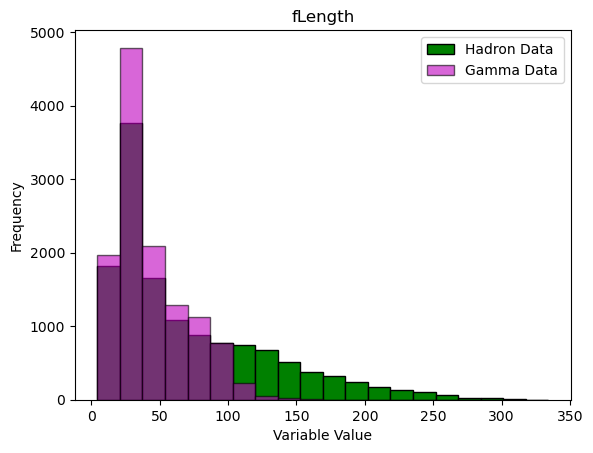

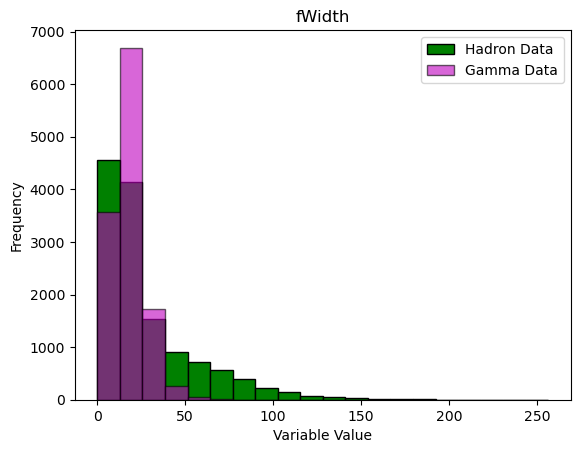

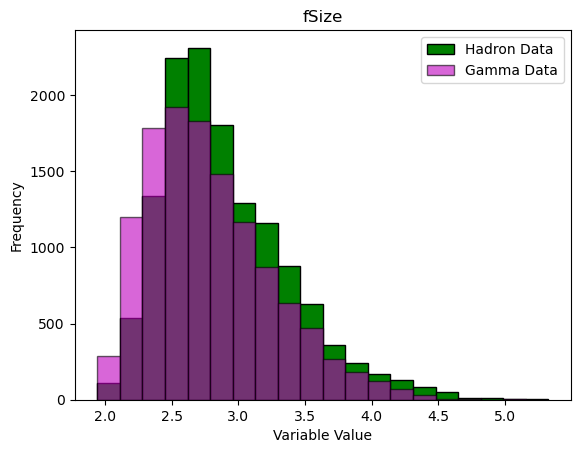

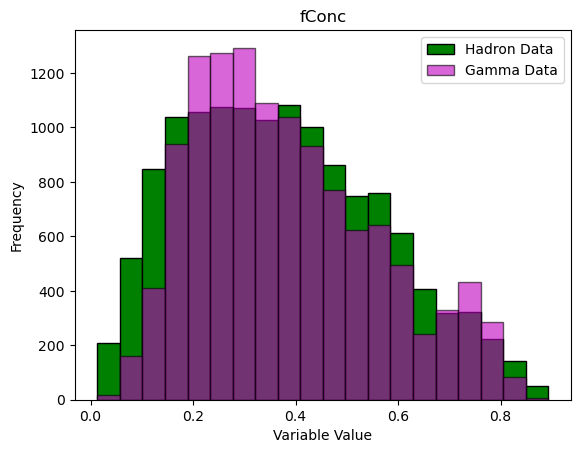

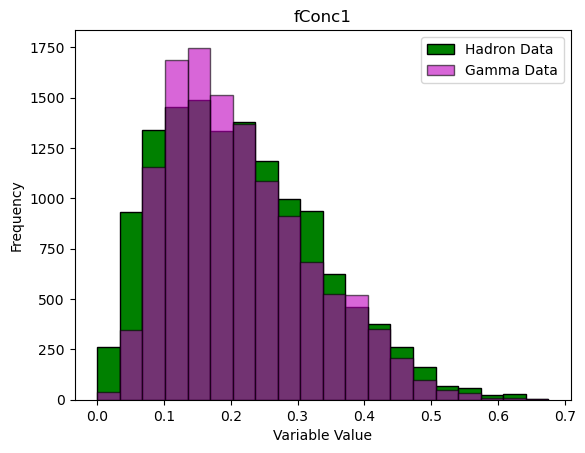

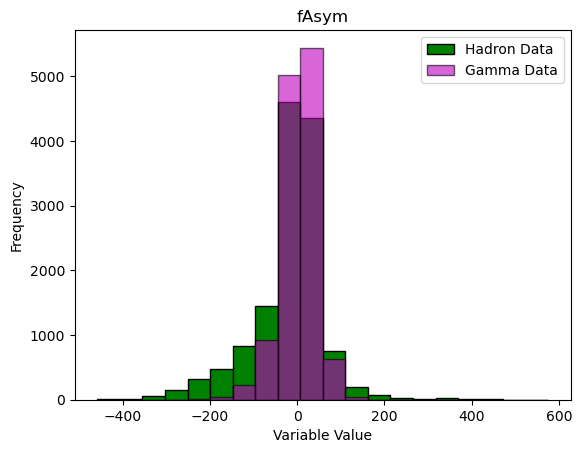

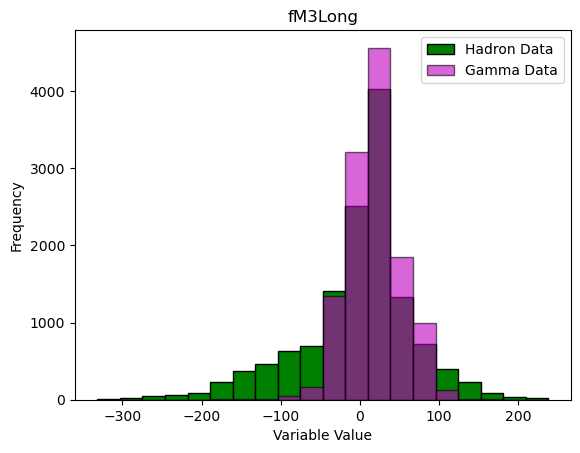

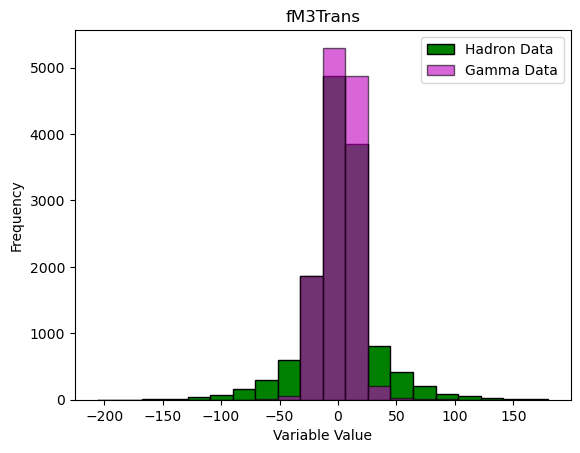

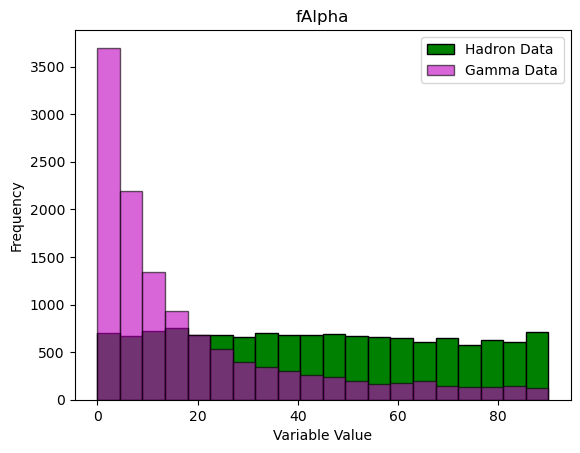

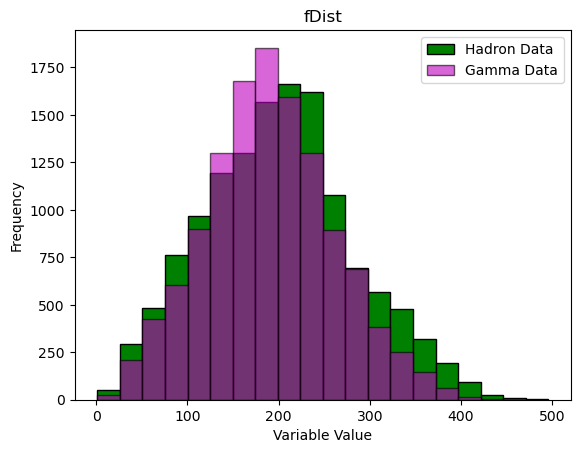

In [231]:
# Look at graphs of each variable, see how the hadron data compares to gamma data 
gamma1_df = gamma_df[gamma_df['class'] == 1].copy()
gamma0_df = gamma_df[gamma_df['class'] == 0].copy()

M = len(gamma1_df[gamma1_df['class'] == 1])
duplicated_gamma0 = pd.concat([gamma0_df] * 2, ignore_index=True)
M_nonpulsar = len(gamma0_df[gamma0_df['class'] == 0])
M_newpulsar = len(duplicated_gamma0[duplicated_gamma0['class'] == 0])

for i in range(10):
    lab = gamma_labels[i]
    temp_gamma0 = duplicated_gamma0[lab].to_numpy()
    temp_gamma1 = gamma1_df[lab].to_numpy()

    temp_gamma = np.concatenate((temp_gamma0, temp_gamma1))
    totalmin = np.min(temp_gamma)
    totalmax = np.max(temp_gamma)

    plt.hist(duplicated_gamma0[lab], range=(totalmin, totalmax), bins=20, color = 'g', edgecolor = 'k', label="Hadron Data")
    plt.hist(gamma1_df[lab], range=(totalmin, totalmax), bins=20, color = 'm', alpha=0.6, edgecolor = 'k', label="Gamma Data")
    plt.legend()
    plt.title(lab)
    plt.xlabel("Variable Value")
    plt.ylabel("Frequency")
    plt.show()  

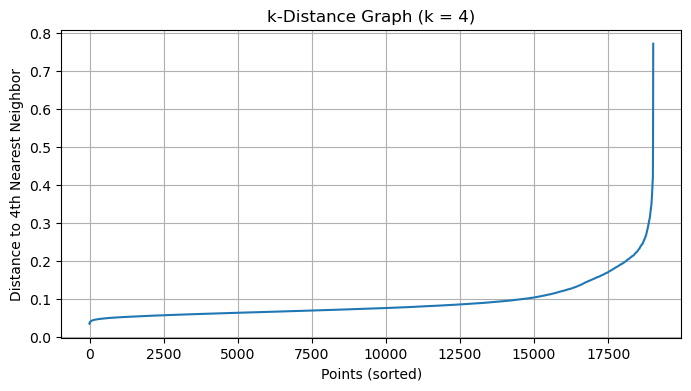

In [306]:
# We can use the k-distance graph to find the ideal radius for these points based on how close they are by examining the curve. 
# The radius is relatively small since the points are normalized. 
k = 4
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(XN)
distances, indices = nbrs.kneighbors(XN)
sorted_distances = np.sort(distances[:, k-1])

plt.figure(figsize=(8, 4))
plt.plot(sorted_distances)
plt.title(f"k-Distance Graph (k = {k})")
plt.xlabel("Points (sorted)")
plt.ylabel(f"Distance to {k}th Nearest Neighbor")
plt.grid(True)
plt.show() 

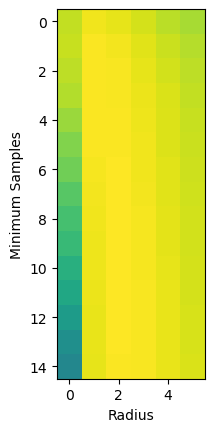

In [297]:
# Now let's look at a heatmap 

fig, ax = plt.subplots()
ax.set_xlabel("Radius") 
ax.set_ylabel("Minimum Samples")  
im = ax.imshow(200 - loss_data, norm=colors.LogNorm(50)) 

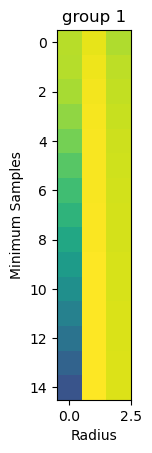

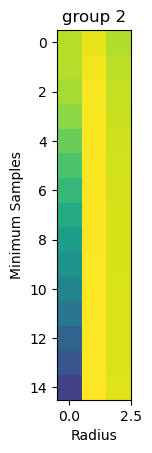

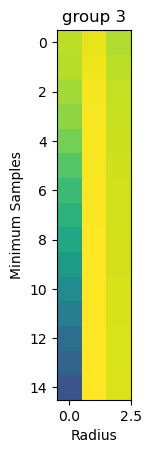

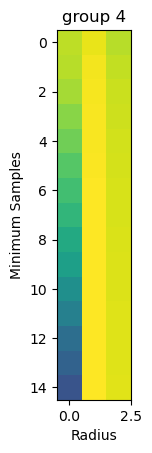

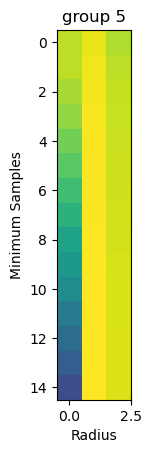

In [307]:
# Heatmaps for each validation set 

for i in range(5):
    fig, ax = plt.subplots()
    ax.set_title(f"group {i+1}") 
    ax.set_xlabel("Radius") 
    ax.set_ylabel("Minimum Samples") 
    im = ax.imshow(200 - valid_results[i], norm=colors.LogNorm(50)) 